In [1]:
suppressWarnings(suppressMessages({
    library(rvest)
    library(readr)
    library(dplyr)
    library(ggplot2)
    library(reshape2)
    library(tidyverse)
    }))

In [2]:
table_collect <- function(url){
    page <- read_html(url)

    # Extract tables with class "wikitable"
    tables <- page %>%
      html_nodes("table.wikitable") %>% 
      html_table(fill = TRUE)  
    return(tables[[4]])
    }

In [3]:
df24g <- table_collect("https://en.wikipedia.org/wiki/2023%E2%80%9324_Premier_League")
df23g <- table_collect("https://en.wikipedia.org/wiki/2022%E2%80%9323_Premier_League")
df23g

Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,Manchester City (C),38,28,5,5,94,33,+61,89,Qualification to Champions League group stage
2,Arsenal,38,26,6,6,88,43,+45,84,Qualification to Champions League group stage
3,Manchester United,38,23,6,9,58,43,+15,75,Qualification to Champions League group stage
4,Newcastle United,38,19,14,5,68,33,+35,71,Qualification to Champions League group stage
5,Liverpool,38,19,10,9,75,47,+28,67,Qualification to Europa League group stage[a]
6,Brighton & Hove Albion,38,18,8,12,72,53,+19,62,Qualification to Europa League group stage[a]
7,Aston Villa,38,18,7,13,51,46,+5,61,Qualification to Europa Conference League play-off round[b]
8,Tottenham Hotspur,38,18,6,14,70,63,+7,60,
9,Brentford,38,15,14,9,58,46,+12,59,


In [4]:
df24 <- df24g[, c("Team", "Pts")]
df24 <- rename(df24, Pts24=Pts)

df23 <- df23g[, c("Team", "Pts")]
df23 <- rename(df23, Pts23=Pts)


df23a <- df23g[, c("Team", "Pos")]
df24a <- df24g[, c("Team", "Pos")]

In [5]:
df23a <- df23a %>%
  mutate(Team = gsub(" \\(C\\)| \\(R\\)$", "", Team))

df24a <- df24a %>%
  mutate(Team = gsub(" \\(C\\)| \\(R\\)$", "", Team))

In [6]:
df23
df24

Team,Pts23
<chr>,<int>
Manchester City (C),89
Arsenal,84
Manchester United,75
Newcastle United,71
Liverpool,67
Brighton & Hove Albion,62
Aston Villa,61
Tottenham Hotspur,60
Brentford,59


Team,Pts24
<chr>,<chr>
Manchester City (C),91
Arsenal,89
Liverpool,82
Aston Villa,68
Tottenham Hotspur,66
Chelsea,63
Newcastle United,60
Manchester United,60
West Ham United,52


In [7]:
df_full <- full_join(df23a, df24a, by = "Team")
#df_full$Pts23 <- as.character(df_full$Pts23)
#df_full

In [8]:
df_full[is.na(df_full)] <- 19

In [9]:
df_full

Team,Pos.x,Pos.y
<chr>,<int>,<int>
Manchester City,1,1
Arsenal,2,2
Manchester United,3,8
Newcastle United,4,7
Liverpool,5,3
Brighton & Hove Albion,6,11
Aston Villa,7,4
Tottenham Hotspur,8,5
Brentford,9,16


In [10]:
#df_full$Pts23 <- gsub("\\[d\\]| \\[d]\\$", "", df_full$Pts23)

In [11]:
df_full
df_full[] <- lapply(df_full, function(x) gsub("\\[c\\]|\\[d\\]$", "", x))
df_full

Team,Pos.x,Pos.y
<chr>,<int>,<int>
Manchester City,1,1
Arsenal,2,2
Manchester United,3,8
Newcastle United,4,7
Liverpool,5,3
Brighton & Hove Albion,6,11
Aston Villa,7,4
Tottenham Hotspur,8,5
Brentford,9,16


Team,Pos.x,Pos.y
<chr>,<chr>,<chr>
Manchester City,1,1
Arsenal,2,2
Manchester United,3,8
Newcastle United,4,7
Liverpool,5,3
Brighton & Hove Albion,6,11
Aston Villa,7,4
Tottenham Hotspur,8,5
Brentford,9,16


In [12]:
#df_full$Pts24 <- gsub("\\[c\\]| \\[d]\\$", "", df_full$Pts24)

In [17]:
df_full_long <- pivot_longer(
    df_full,
    cols = starts_with("Pos"),
    names_to = "Year",
    values_to = "Position"
)
df_full_long

Team,Year,Position
<chr>,<chr>,<chr>
Manchester City,Pos.x,1
Manchester City,Pos.y,1
Arsenal,Pos.x,2
Arsenal,Pos.y,2
Manchester United,Pos.x,3
Manchester United,Pos.y,8
Newcastle United,Pos.x,4
Newcastle United,Pos.y,7
Liverpool,Pos.x,5


In [18]:
df_full_long$Position <- as.numeric(df_full_long$Position)
df_full_long

Team,Year,Position
<chr>,<chr>,<dbl>
Manchester City,Pos.x,1
Manchester City,Pos.y,1
Arsenal,Pos.x,2
Arsenal,Pos.y,2
Manchester United,Pos.x,3
Manchester United,Pos.y,8
Newcastle United,Pos.x,4
Newcastle United,Pos.y,7
Liverpool,Pos.x,5


Team,Year,Position
<chr>,<chr>,<dbl>
Manchester City,Pos.x,1
Manchester City,Pos.y,1
Arsenal,Pos.x,2
Arsenal,Pos.y,2
Manchester United,Pos.x,3
Manchester United,Pos.y,8
Newcastle United,Pos.x,4
Newcastle United,Pos.y,7
Liverpool,Pos.x,5


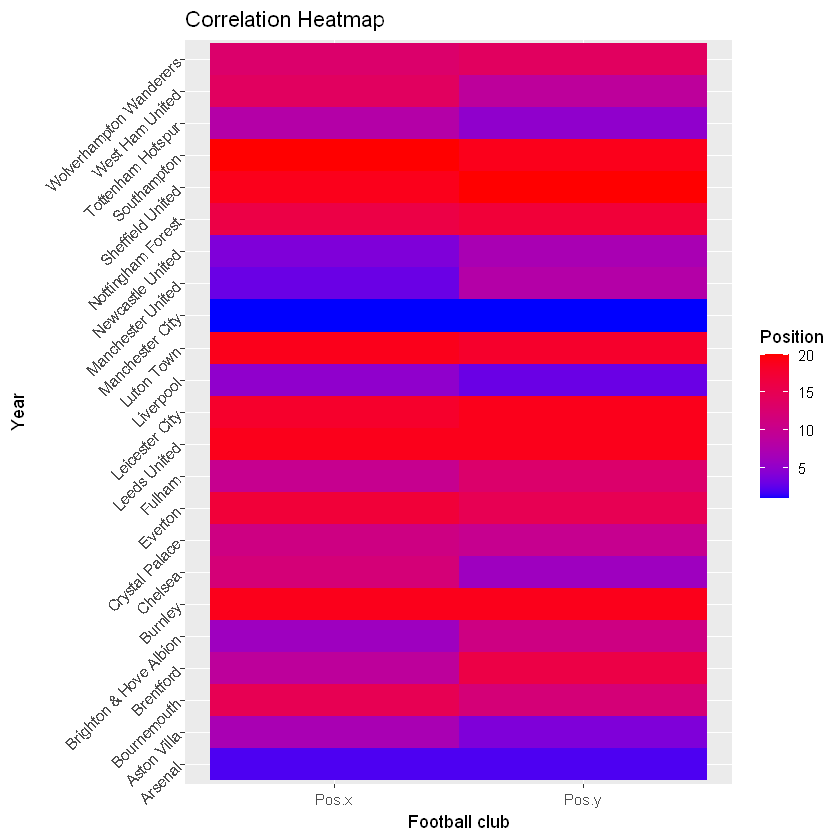

In [19]:
df_full_long


ggplot(df_full_long, aes(x = Year, y = Team, fill = Position)) +
  geom_tile() +
  labs(title = "Correlation Heatmap",
       x = "Football club",
       y = "Year")+
scale_fill_gradient(
    low = "blue",      # Color for low values
    high = "red")+  
theme(axis.text.y = element_text(angle = 45, hjust = 1)) 

In [ ]:
ggplot(df, aes(x = Year, y = Position, color = Team)) +
  geom_line() +
  scale_y_reverse() +  # Reverse the y-axis so that 1st place is at the top
  theme_minimal() +
  labs(title = "Premier League Team Rankings Over Time", x = "Year", y = "Position")

In [21]:
df_full_long

Team,Year,Position
<chr>,<chr>,<dbl>
Manchester City,Pos.x,1
Manchester City,Pos.y,1
Arsenal,Pos.x,2
Arsenal,Pos.y,2
Manchester United,Pos.x,3
Manchester United,Pos.y,8
Newcastle United,Pos.x,4
Newcastle United,Pos.y,7
Liverpool,Pos.x,5
